# Diabetes Prediction

## Loading Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

### Exploring Feature Distributions

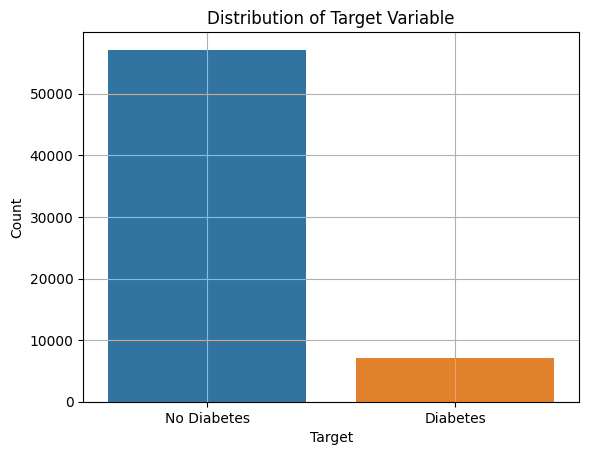

In [21]:
no_diabetes = data['diabetes'].value_counts()[0]
diabetes = data['diabetes'].value_counts()[1]
counts = [no_diabetes, diabetes]
targets = ['No Diabetes', 'Diabetes']
sns.barplot(x=targets, y=counts)
plt.grid()
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

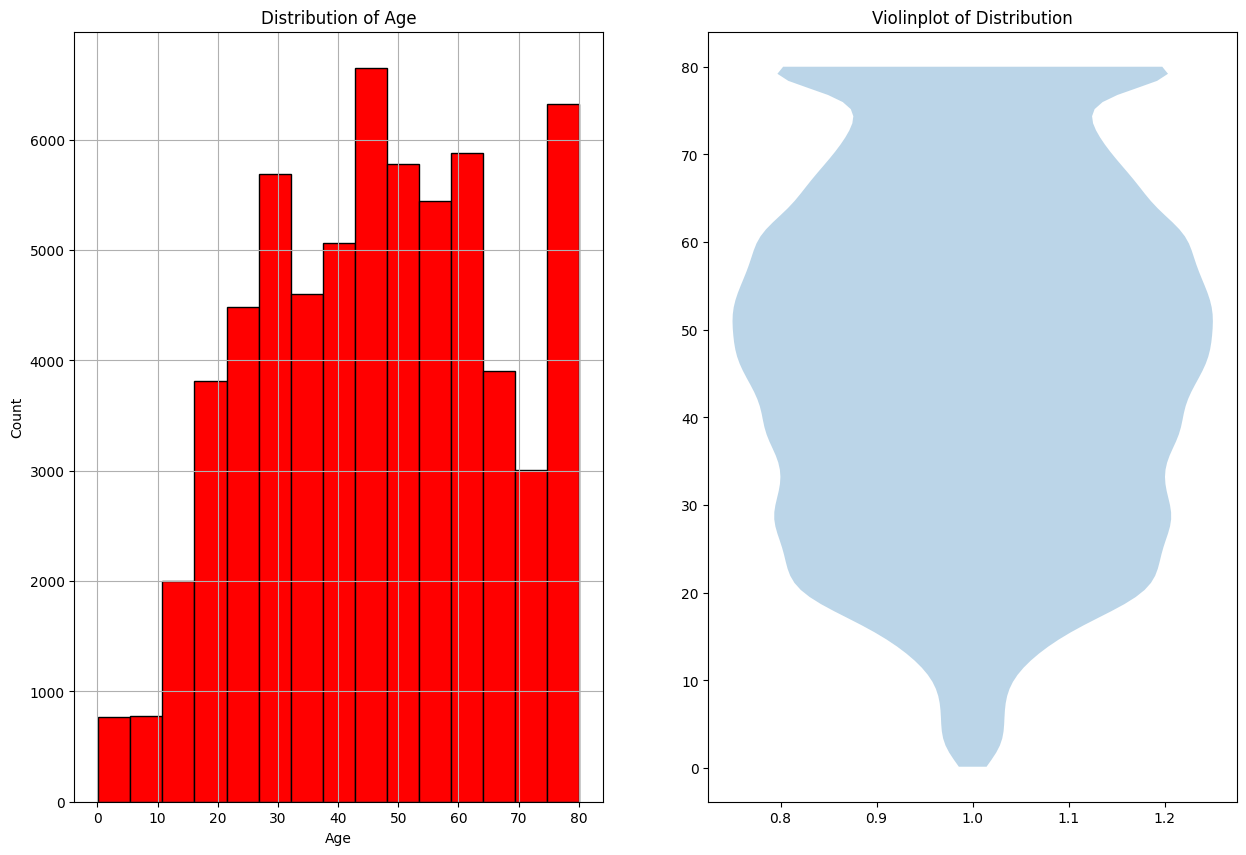

In [30]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['age'], color='red', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['age'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

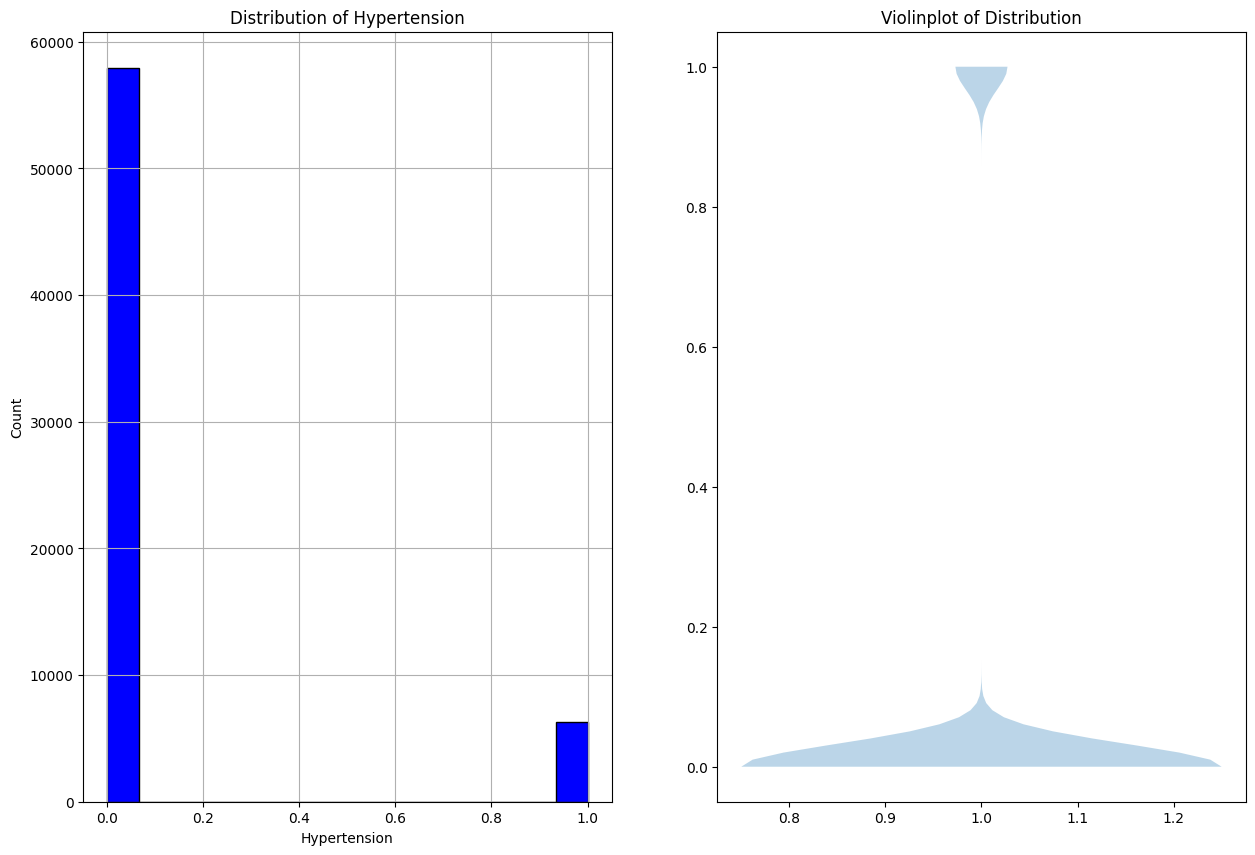

In [31]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['hypertension'], color='blue', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Hypertension')
ax[0].set_xlabel('Hypertension')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['hypertension'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

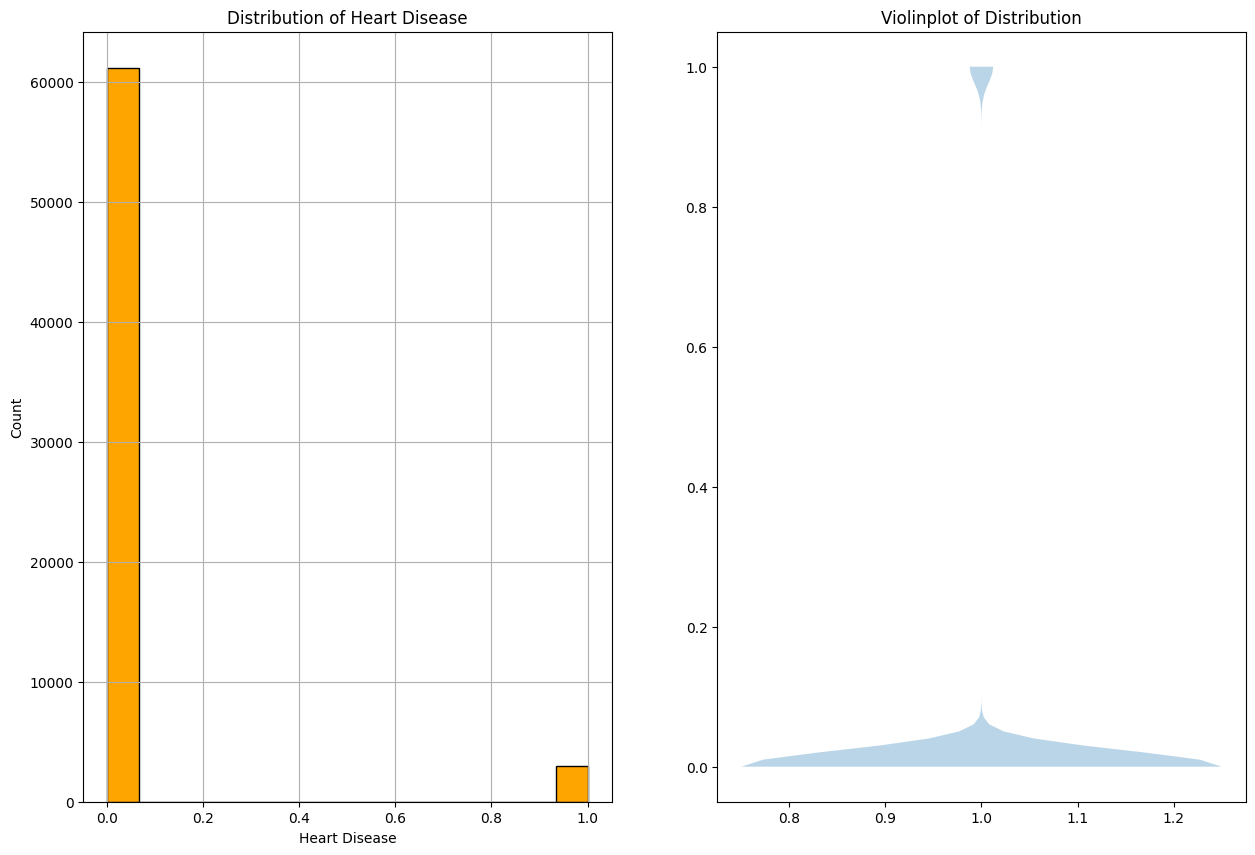

In [33]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['heart_disease'], color='Orange', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Heart Disease')
ax[0].set_xlabel('Heart Disease')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['heart_disease'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

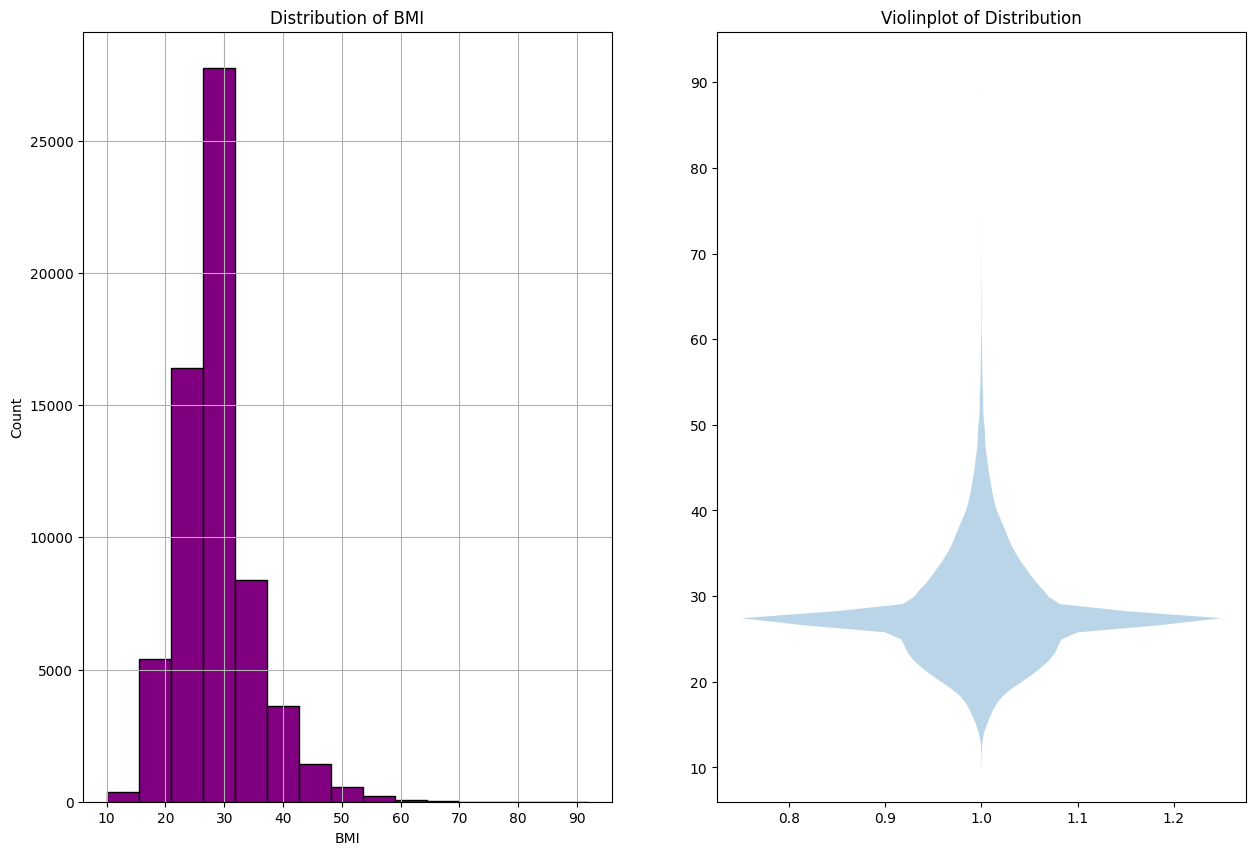

In [35]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['bmi'], color='purple', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of BMI')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['bmi'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

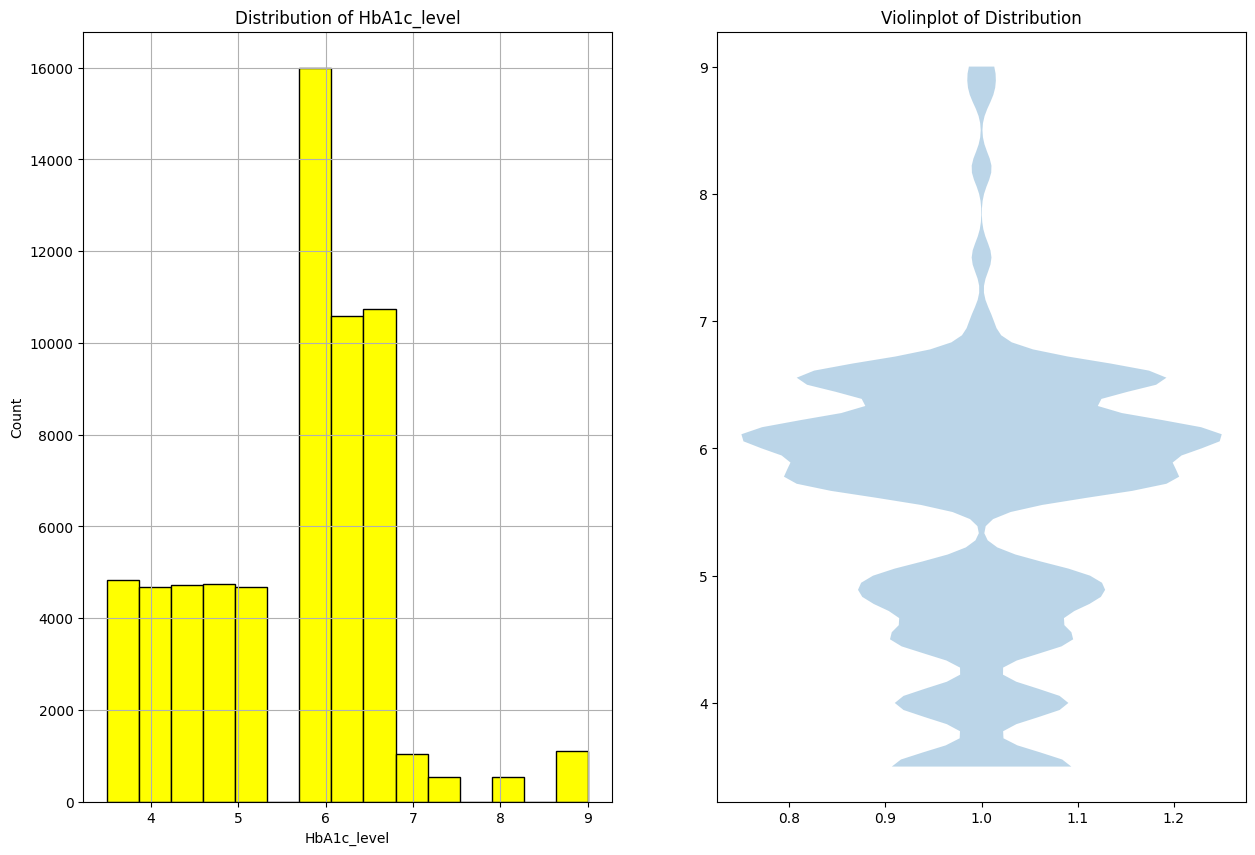

In [38]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['HbA1c_level'], color='yellow', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of HbA1c_level')
ax[0].set_xlabel('HbA1c_level')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['HbA1c_level'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

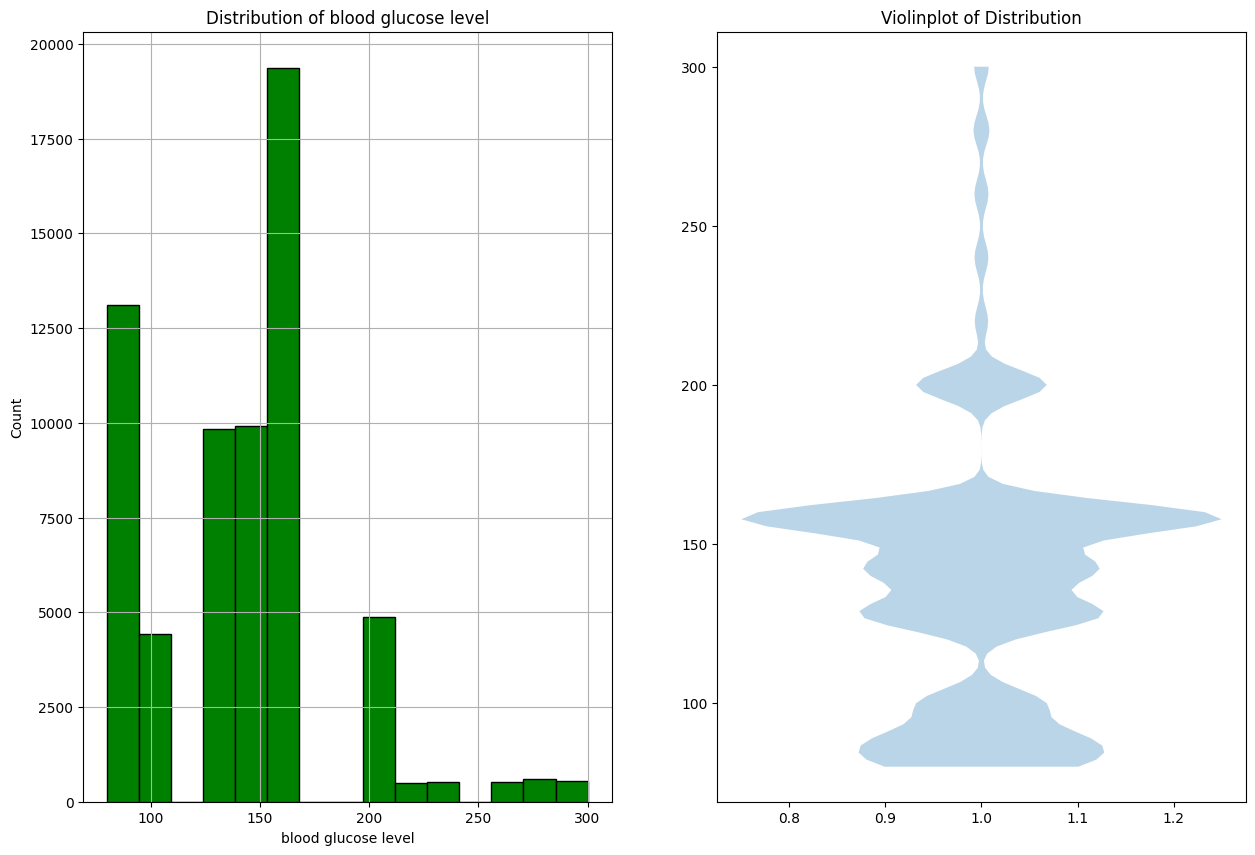

In [40]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['blood_glucose_level'], color='green', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of blood glucose level')
ax[0].set_xlabel('blood glucose level')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['blood_glucose_level'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

### Exploring Relationships between Features and Target Variable

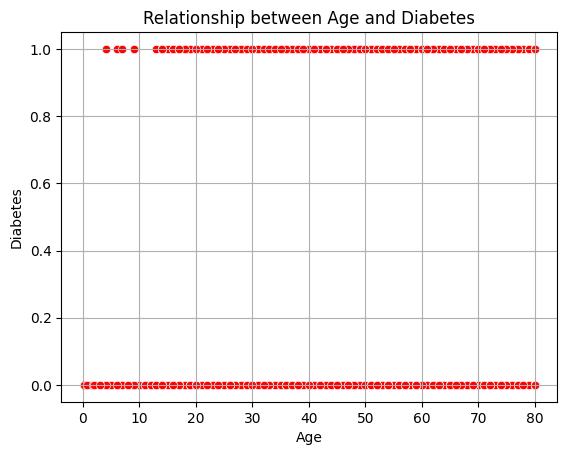

In [45]:
sns.scatterplot(data=data, x='age', y='diabetes', color='red')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Relationship between Age and Diabetes')
plt.grid()

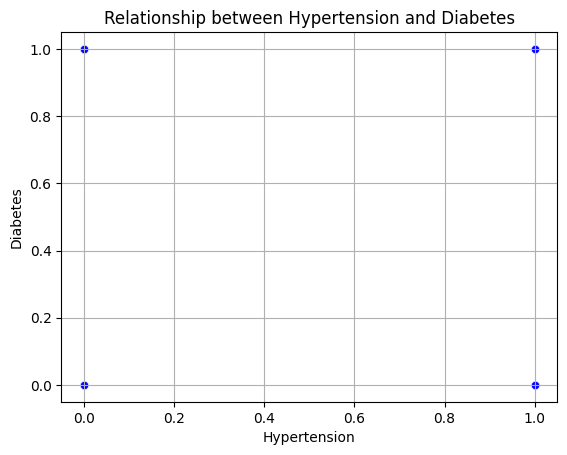

In [46]:
sns.scatterplot(data=data, x='hypertension', y='diabetes', color='blue')
plt.xlabel('Hypertension')
plt.ylabel('Diabetes')
plt.title('Relationship between Hypertension and Diabetes')
plt.grid()

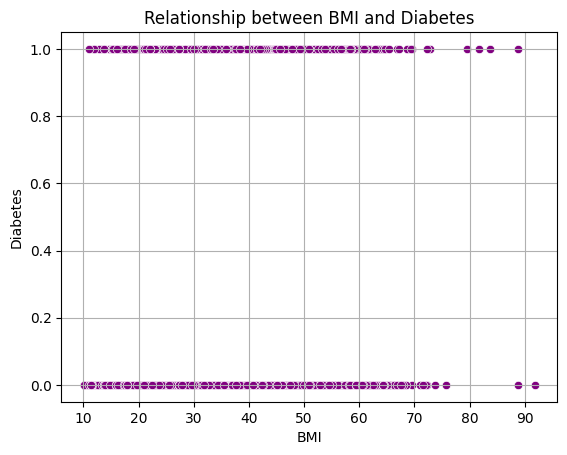

In [49]:
sns.scatterplot(data=data, x='bmi', y='diabetes', color='purple')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Relationship between BMI and Diabetes')
plt.grid()

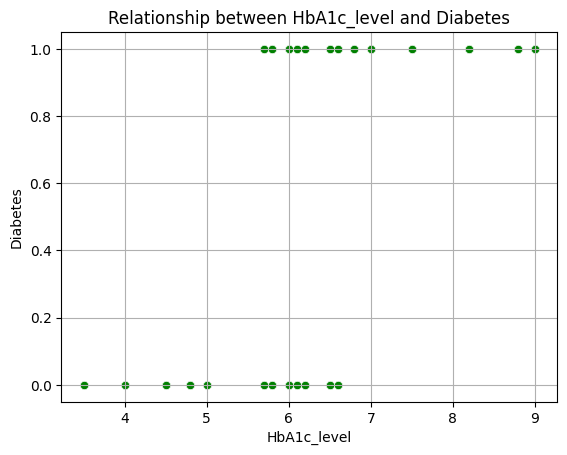

In [50]:
sns.scatterplot(data=data, x='HbA1c_level', y='diabetes', color='green')
plt.xlabel('HbA1c_level')
plt.ylabel('Diabetes')
plt.title('Relationship between HbA1c_level and Diabetes')
plt.grid()

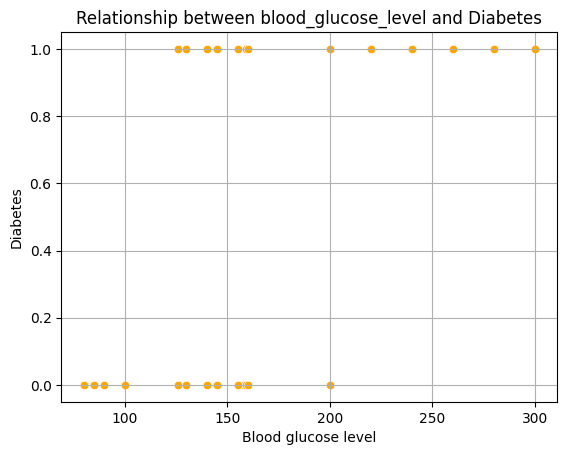

In [51]:
sns.scatterplot(data=data, x='blood_glucose_level', y='diabetes', color='orange')
plt.xlabel('Blood glucose level')
plt.ylabel('Diabetes')
plt.title('Relationship between blood_glucose_level and Diabetes')
plt.grid()

### Conclusion Gathered from Exploratory Data Analysis
#### The following features Hypertension, BMI, HbA1c level and Blood Glucose Levels all have clear defined decision boundaries that are optimal for Support Vector Machine Classification therefore I will proceed to use these variables and train an SVM model using them

## Data Preprocessing

In [5]:
import numpy as np

In [6]:
data.loc[data["smoking_history"] == "No Info", "smoking_history"] = np.nan
data.loc[data['smoking_history'] == 'current', 'smoking_history'] = 1
data.loc[data['smoking_history'] == 'never', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'ever', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'not current', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'former', 'smoking_history'] = 2


data.loc[data['gender'] == 'Male', 'gender'] = 1
data.loc[data['gender'] == 'Female', 'gender'] = 0
data.loc[data['gender'] == 'Other', 'gender'] = 2

In [7]:
data = data.dropna()

In [52]:
best_features = ['age', 'hypertension', 'HbA1c_level', 'bmi', 'blood_glucose_level']

## Splitting the Data into Training and Test Sets

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [58]:
X_train = X_train[best_features]
X_test = X_test[best_features]

## Scaling the Data

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=scalar.get_feature_names_out())

X_test = scalar.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=scalar.get_feature_names_out())

In [63]:
X_train.head()

,age,hypertension,HbA1c_level,bmi,blood_glucose_level
0,0.125766,-0.330451,-1.888219,2.650327,0.482338
1,0.841275,3.026164,-0.700040,-0.122392,1.430913
2,-0.794174,-0.330451,-0.517243,0.294974,-0.940525
3,0.023551,-0.330451,0.213943,0.584981,-0.323951
4,1.710107,-0.330451,0.579537,-1.391367,0.458624


In [64]:
X_test.head()

,age,hypertension,HbA1c_level,bmi,blood_glucose_level
0,0.742812,-0.325238,0.129224,-0.141279,-1.411481
1,-1.161012,-0.325238,-0.688167,-0.781596,-1.292867
2,0.331174,-0.325238,2.399754,1.667580,2.384160
3,-0.286282,-0.325238,-0.506524,2.524407,0.367726
4,0.279720,-0.325238,0.220045,-0.299438,0.011884


## Creating the Model

In [65]:
from sklearn.svm import SVC

In [67]:
model = SVC()
model.fit(X_train, y_train)

SVC()

## Evaluating the Model

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Evaluation on Training Data

In [69]:
train_pred = model.predict(X_train)

In [73]:
train_accuracy = accuracy_score(y_true=y_train, y_pred=train_pred)
print(f'Accuracy Score on Training Data : {train_accuracy:.2f}')

Accuracy Score on Training Data : 0.95


In [74]:
train_f1 = f1_score(y_true=y_train, y_pred=train_pred)
print(f'F1 Score on Training Data : {train_f1:.2f}')

F1 Score on Training Data : 0.74


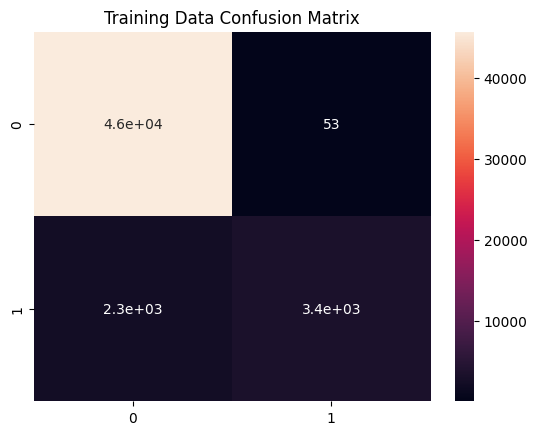

In [77]:
train_conf_matrix = confusion_matrix(y_true=y_train, y_pred=train_pred)
sns.heatmap(train_conf_matrix, annot=True)
plt.title('Training Data Confusion Matrix')
plt.show()

### Evaluation on Test Data

In [71]:
test_pred = model.predict(X_test)

In [80]:
test_accuracy = accuracy_score(y_true=y_test, y_pred=test_pred)
print(f'Accuracy Score on Test Data : {test_accuracy:.2f}')

Accuracy Score on Test Data : 0.96


In [81]:
test_f1 = f1_score(y_true=y_test, y_pred=test_pred)
print(f'F1 Score on Test Data : {test_f1:.2f}')

F1 Score on Test Data : 0.76


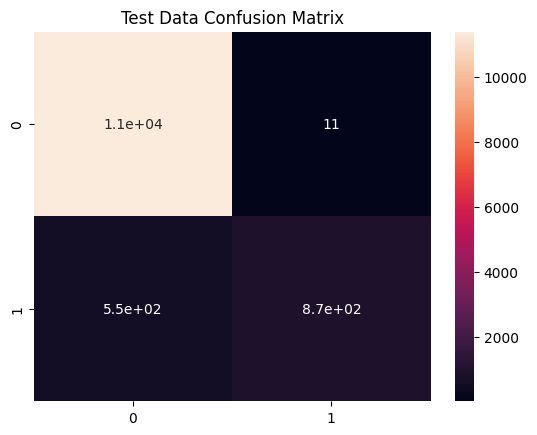

In [82]:
test_conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_pred)
sns.heatmap(test_conf_matrix, annot=True)
plt.title('Test Data Confusion Matrix')
plt.show()

## Saving the Model

In [84]:
import joblib

In [85]:
joblib.dump(model, 'SVC_Diabetes_Model.pkl')

['SVC_Diabetes_Model.pkl']